In [1]:
import sys, os
import numpy as np
import xarray as xr
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import cartopy as ctp
import geo_preprocessing as gp

In [12]:
dirname = "/home/jakob/climate_data/local/era5/"
fname = dirname +"era5_sst_2000-2019_mon_anomalies.nc"
dataset = gp.PacificAnomaliesDataset(nc_file=fname, transform=transforms.Compose([gp.ToTensor()]) )

Set the antimeridian to the new longitude zero.


Could not convert time to torch.Tensor!
0 torch.Size([60, 170]) tensor(1) 2000-01-16T12:00:00.000000000
Could not convert time to torch.Tensor!
1 torch.Size([60, 170]) tensor(2) 2000-02-15T12:00:00.000000000
Could not convert time to torch.Tensor!
2 torch.Size([60, 170]) tensor(3) 2000-03-16T12:00:00.000000000


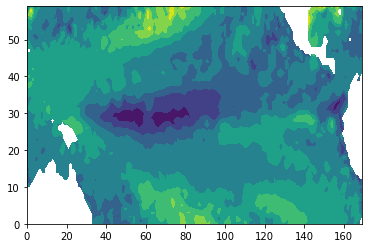

In [13]:
for i in range(len(dataset)):
    sample = dataset[i]

    print(i, sample['ssta'].shape, sample['month'], sample['time'])
    plt.contourf(sample['ssta'])
    if i == 2:
        plt.show()
        break

In [15]:
# Create dataloader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)